In [1]:
!pip install qiskit-braket-provider --quiet

In [2]:
from qbraid.transpiler import Conversion, ConversionGraph, convert_to_package

The qBraid SDK does not support direct conversions between all supported packages. Instead, some conversions, like braket to qiskit, require multiple conversions within the default graph model, e.g. braket $\rightarrow$ qasm3 $\rightarrow$ qiskit.

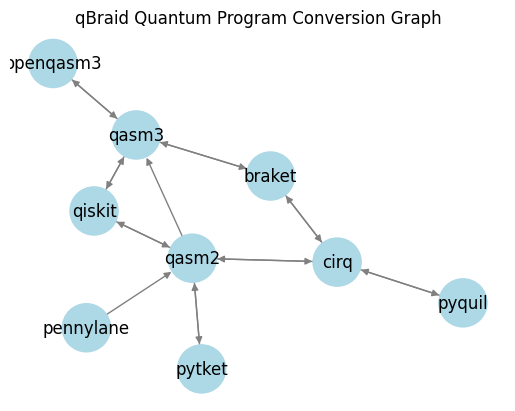

In [3]:
graph = ConversionGraph()

graph.plot()

While the qiskit-braket-provider package offers direct conversions, this comes with a trade-off. It eliminates intermediate steps but tends to be more prone to errors, particularly with unsupported gates, compared to the qBraid transpiler. To leverage the best of both, you can integrate the qiskit-braket-provider's direct conversion into the qBraid transpiler's conversion graph. Consequently, when converting from Braket to Qiskit, the transpiler will first try the direct conversion through the qiskit-braket-provider. If this conversion fails, it will automatically revert to one of the other native qBraid conversion paths

In [4]:
import logging

logger = logging.getLogger()

logger.setLevel(logging.INFO)

In [5]:
from qiskit import QuantumCircuit

qiskit_circuit = QuantumCircuit(2)

qiskit_circuit.h(0)
qiskit_circuit.cx(0, 1)

qiskit_circuit.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

In [6]:
braket_circuit = convert_to_package(qiskit_circuit, "braket", conversion_graph=graph)

print(braket_circuit)

INFO:root:
Successfully transpiled using conversions: qiskit -> qasm3 -> braket


T  : |0|1|
          
q0 : -H-C-
        | 
q1 : ---X-

T  : |0|1|


And now, we can try the same example, but with the direct conversion as a new shortest path

In [7]:
from qiskit_braket_provider.providers.adapter import convert_qiskit_to_braket_circuit

In [8]:
conversion = Conversion("qiskit", "braket", convert_qiskit_to_braket_circuit)

In [9]:
graph.add_conversion(conversion)

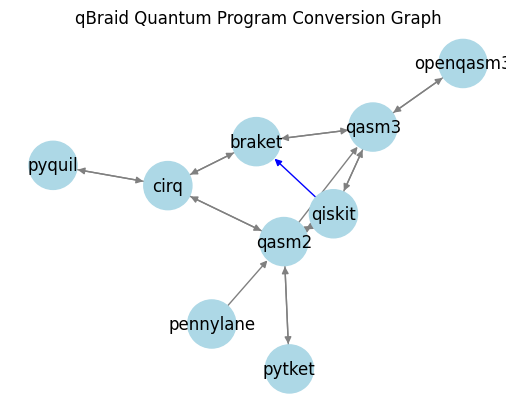

In [10]:
graph.plot()

In [11]:
braket_circuit = convert_to_package(qiskit_circuit, "braket", conversion_graph=graph)

print(braket_circuit)

INFO:root:
Successfully transpiled using conversions: qiskit -> braket


T  : |0|1|
          
q0 : -H-C-
        | 
q1 : ---X-

T  : |0|1|
